# Ensemble Models: Random Forest
The following is an example of implementing and evaluating a Random Forest model.

## Data Preprocessing
<hr>

In [1]:
# Make necessary imports
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/seattle_weather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [8]:
df['RAIN'].unique()

array([True, False], dtype=object)

In [9]:
df['RAIN'] = df['RAIN'].astype(bool)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 1022.9+ KB


In [11]:
X = df.iloc[:, 1:-1].values.copy()
y = df.iloc[:, -1].values.copy()

## Random Forest Model
<hr>

### Model Building

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2)

In [13]:
clf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [14]:
score = clf.score(X_train, y_train)

In [15]:
print(score)

1.0


### Model Validation

In [16]:
predictions = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[3002    0]
 [   0 2108]]


Text(0.5, 1.0, 'Accuracy Score: 100.0%')

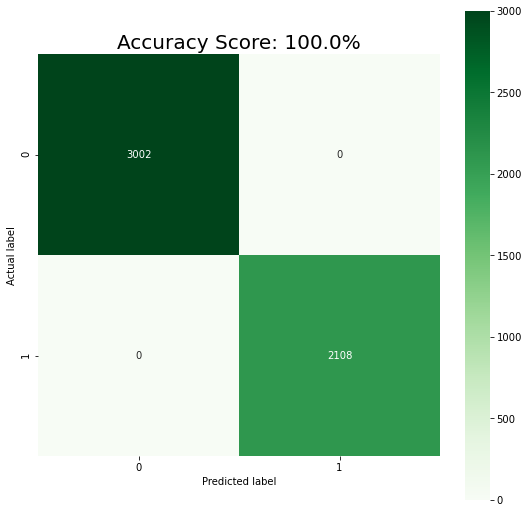

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}%'.format(score*100)
plt.title(all_sample_title, size=20)